## Masterschoool_Vehicles_Project:
## Clasification+Clustering:

A chain of car repair shops called “Prospect Auto” asked you for a model that would differentiate all 3 vehicles based on the silhouette. So, eventually, you need to create a classification model that would predict a vehicle class. The question that may arise: what exactly is needed to approach this project? Let’s discuss it in the next section!

### Steps in the Project:
You already know how to generally approach data-driven project. Our project isn’t an exception. So, to come up to the final model, these steps will be crucial in your flow:
- Import all of the libraries you need, upload the dataset and read it in.
- Conduct a good Exploratory Data Analysis, understanding the data both visually and numerically.
- Prepare your data for future modelling by normalizing and standardizing its columns. Also, don’t forget to divide the dataset into subsets (for training and testing purposes) at this stage!
- Check if dimensionality reduction makes a difference here. If it possible to reduce the number of dimensions from original 18 to a lower number while preserving the variance in the data, don’t hesitate to do it. PCA is great algo for this purpose!


### Data Description

The data that you’ll work with in this project contains features extracted from the silhouette of vehicles in different angles. In other words, all of the features that you are going to work with are geometric features extracted from the silhouette. They all are numeric in nature.

Features from the silhouette in the dataset are for the three vehicles. Here the are:
- a bus (which is a double decker bus)
- a van (which is a Cheverolet van)
- a car (either Saab 9000 or Opel Manta)

This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.

The dataset is available for downloading here. Let’s briefly discuss what kind of columns this dataset has:
- the class column contains vehicle models. As we discussed previously, there may be 3 values there: bus , van or car.
- the rest of the columns are numerical columns that describe the silhouette. Don’t worry if you don’t fully understand the rationale behind these columns. Treat them as some numbers that can tell you something about a silhouette of a particular vehicle.

Try solving classification problem “Prospect Auto” asked you to address from two different perspectives: first, using a supervised classification approach or via unsupervised-based clustering way. Compare the approaches by calculating relevant metrics.  

## ELT - Descriptive Analysis:
- Summarize the main features of the data.

In [87]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns

In [88]:
vehicles = pd.read_csv('vehicle.csv')

In [89]:
vehicles.shape

(846, 19)

In [90]:
vehicles.head() 

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [91]:
vehicles.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


In [92]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [93]:
# Check for missing values
vehicles.isna().sum() 

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

**Small Number of Missing Values:** If the proportion of missing values is very small (e.g., less than 5%) and randomly distributed, removing those rows might not significantly impact the analysis or model performance.

In [94]:
# .dropna() - remove missing values from the dataset 
vehicles.dropna(inplace=True)
vehicles.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [95]:
# pair plot of the data using seaborn library 
#sns.pairplot(vehicles) 
'''The pairplot function from the Seaborn library is used to create a grid of 
scatter plots for each pair of numerical features in a dataset. 
It helps visualize relationships between variables and can also show distributions of 
individual variables along the diagonal.'''
# takes a while to run with 6 features and 846 rows of data 

'The pairplot function from the Seaborn library is used to create a grid of \nscatter plots for each pair of numerical features in a dataset. \nIt helps visualize relationships between variables and can also show distributions of \nindividual variables along the diagonal.'

In [96]:
vehicles['class'].value_counts()

class
car    413
bus    205
van    195
Name: count, dtype: int64

In [97]:
#%pip uninstall -y scikit-learn
#%pip install scikit-learn==1.5.2
from sklearn.preprocessing import LabelEncoder

Encoding in the context of machine learning is the process of converting categorical data into numerical formats that can be used by machine learning algorithms.

- Label Encoding: Converts each category to a unique integer. Simple, but can introduce an ordinal relationship that may not exist.

In [98]:
# Encode the target variable 'class' using LabelEncoder
label_encoder = LabelEncoder()
vehicles['class_enc'] = label_encoder.fit_transform(vehicles['class'])

# Display the encoded class distribution
vehicles['class_enc'].value_counts()

class_enc
1    413
0    205
2    195
Name: count, dtype: int64

In [99]:
vehicles.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class,class_enc
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van,2
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van,2
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car,1
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van,2
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus,0


## EDA - Diagnostic Analysis:
- Investigate relationships and causes behind the data patterns.

Correlation Coefficients: These values range from -1 to 1.

- 1 indicates a perfect positive correlation.

- -1 indicates a perfect negative correlation.

- 0 indicates no correlation.

Purpose: It's used to understand the relationships between different variables in your dataset. High absolute values suggest a strong relationship, while values close to zero suggest a weak relationship.

In [100]:
# leave only the numeric columns
vehicles_num = vehicles.select_dtypes(include=[np.number])

# correlation matrix with class_enc
correlation_with_class_enc = vehicles_num.corr()['class_enc'].sort_values(ascending=False)
print(correlation_with_class_enc)

class_enc                      1.000000
elongatedness                  0.342712
hollows_ratio                  0.212830
max.length_aspect_ratio        0.202235
skewness_about                 0.121780
skewness_about.2               0.048421
skewness_about.1              -0.020470
max.length_rectangularity     -0.025539
compactness                   -0.037391
distance_circularity          -0.067445
pr.axis_aspect_ratio          -0.114292
circularity                   -0.161018
scaled_radius_of_gyration.1   -0.193428
radius_ratio                  -0.199219
scaled_radius_of_gyration     -0.243083
pr.axis_rectangularity        -0.255354
scaled_variance.1             -0.286044
scatter_ratio                 -0.287590
scaled_variance               -0.311065
Name: class_enc, dtype: float64


A histogram is a graphical representation of the distribution of a dataset. Here are the key points:

- Bins: The range of values is divided into intervals, known as bins.

- Frequency: Each bin shows the count of data points that fall within its range.

- Shape: The shape of the histogram reveals the data distribution, such as whether it is normal, skewed, bimodal, etc.

- Axis: The x-axis represents the bins, and the y-axis represents the frequency.

In [101]:
from plotly.graph_objs import Figure, Histogram, Layout

for col in vehicles_num.columns:
    fig = Figure(data=[Histogram(x=vehicles_num[col])],
                 layout=Layout(title=col))
    fig.update_layout(bargap=0.1)
    fig.show()

A box plot, also known as a box-and-whisker plot, is a standardized way of displaying the distribution of data based on a five-number summary. Here are the key elements:

- Minimum: The smallest data point, excluding outliers.

- First Quartile (Q1): The median of the lower half of the dataset.

- Median (Q2): The middle value of the dataset.

- Third Quartile (Q3): The median of the upper half of the dataset.

- Maximum: The largest data point, excluding outliers.

The "box" shows the interquartile range (IQR) from Q1 to Q3, and the "whiskers" extend to the minimum and maximum values. Outliers, if any, are often plotted as individual points.

Minimum ---- Q1 |---| Median |---| Q3 ---- Maximum
          
          (whiskers) (box)  (whiskers)


An outlier is a data point that is significantly different from the rest of the data. Outliers can be unusually high or low values that stand apart from other observations. Here are some common methods to identify outliers:

Visual Inspection: Use plots like box plots, scatter plots, or histograms to visually identify data points that stand out.

Statistical Methods:

- IQR Method: Any data point outside the range 
    - [𝑄1−1.5×𝐼𝑄𝑅,𝑄3+1.5×𝐼𝑄𝑅] is considered an outlier. 
    - 𝑄1 and 𝑄3 are the first and third quartiles, 
    - and 𝐼𝑄𝑅 is the interquartile range.

- Z-Score: A z-score measures how many standard deviations a data point is from the mean. Typically, a z-score above 3 or below -3 is considered an outlier.

- Domain Knowledge: Sometimes domain-specific rules help identify outliers. For example, in human height measurements, someone over 8 feet tall could be an outlier.

Outliers can provide important insights into your data but can also affect the performance of some models. It's crucial to investigate and understand their cause before deciding how to handle them.

Would you like to know more about detecting or handling outliers?



In [102]:
from plotly.graph_objs import Box

# create a box plot for each column with class as x axis 
for col in vehicles_num.columns: 
    if col != 'class':
        fig = Figure(data=[Box(y=vehicles_num[col], x=vehicles['class'], name=col)], 
                     layout=Layout(title=f'Box plot of {col} with class'))
        fig.show()


## Machine Learning - Predictive Analysis:
- Predictive Analysis: Use statistical models and machine learning to predict future outcomes based on current data.


### Supervised Machine Learning

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, precision_recall_curve, average_precision_score, f1_score, root_mean_squared_error, r2_score

In [104]:
vehicles.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class,class_enc
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van,2
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van,2
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car,1
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van,2
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus,0


Scaling is the process of transforming the features in your data so that they are on a similar scale. This is important because many machine learning algorithms perform better when features have similar ranges. Here are some common scaling methods:

- **Standard Scaling:** Centers the data by subtracting the mean and scales it by the standard deviation, resulting in a distribution with mean 0 and standard deviation 1.

$$
X_{\text{scaled}} = \frac{X - \mu}{\sigma}
$$
- 𝑋 is the original value.

- 𝜇 is the mean of the feature.

- 𝜎 is the standard deviation of the feature.

- 𝑋 scaled is the resulting scaled value.

In [105]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale only the feature columns
vehicles_scaled = scaler.fit_transform(vehicles.drop(['class_enc', 'class'], axis=1))

# Convert the scaled features back to a DataFrame and add the target column
vehicles_scaled = pd.DataFrame(vehicles_scaled, columns=vehicles.drop(['class_enc', 'class'], axis=1).columns)
vehicles_scaled['class_enc'] = vehicles['class_enc'].values

vehicles_scaled.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class_enc
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837,2
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318,2
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596,1
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243,2
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531,0


In [106]:
# split data into features and target variable 
X = vehicles_scaled.drop(['class_enc'], axis=1)
y = vehicles_scaled['class_enc']

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# create a dictionary of models
models = {'RandomForest': RandomForestClassifier(),
          'KNeighbors': KNeighborsClassifier(),
          'SVC': SVC()}

# train and evaluate each model
for name, model in models.items(): # items() is used to iterate over the key-value pairs of the dictionary 
    model.fit(X_train, y_train) # fit the model using the training data
    y_pred = model.predict(X_test) # predict the target variable using the test data 
    accuracy = accuracy_score(y_test, y_pred) # accuracy_score is used to calculate the accuracy of the model 
    print(f'{name} accuracy: {accuracy:.2f}') # .2f is used to print the accuracy upto 2 decimal places
    #print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))


RandomForest accuracy: 0.95
[[ 59   1   0]
 [  2 128   8]
 [  0   1  45]]
KNeighbors accuracy: 0.94
[[ 60   0   0]
 [  3 127   8]
 [  1   2  43]]
SVC accuracy: 0.98
[[ 60   0   0]
 [  1 133   4]
 [  0   1  45]]


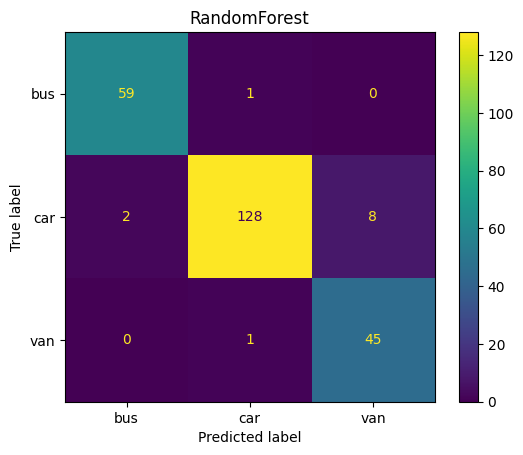

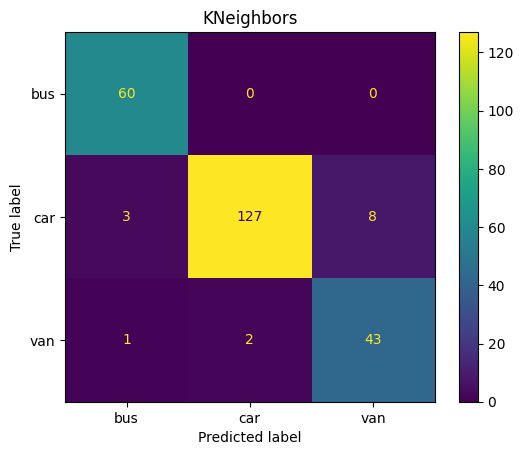

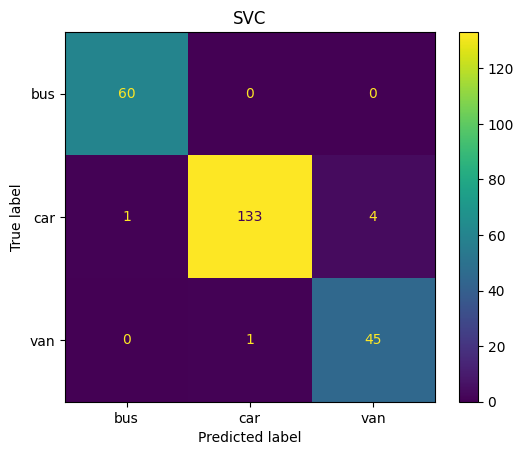

In [107]:
'''confusion matrices for multiple machine learning models using the 
scikit-learn library and Matplotlib for plotting.'''

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

for name, model in models.items():
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=label_encoder.classes_)
    disp.ax_.set_title(name)
    plt.show()


In [108]:

vehicles_scaled['RandomForest'] = RandomForestClassifier().fit(X_train, y_train).predict(X)
vehicles_scaled['KNeighbors'] = KNeighborsClassifier().fit(X_train, y_train).predict(X)
vehicles_scaled['SVC'] = SVC().fit(X_train, y_train).predict(X)

vehicles_scaled.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,...,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class_enc,RandomForest,KNeighbors,SVC
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,...,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837,2,2,2,2
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,...,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318,2,2,2,2
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,...,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596,1,1,1,1
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,...,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243,2,2,2,2
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,...,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531,0,0,2,0


### Unsupervised Machine Learning

In [109]:
# copy vehicles_scaled to vehicles_scaled_copy
vehicles_scaled_copy = vehicles_scaled.copy()

# drop the target variable 'class_enc' from vehicles_scaled_copy
vehicles_scaled_copy.drop('class_enc', axis=1, inplace=True)

# head of vehicles_scaled_copy
vehicles_scaled_copy.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,...,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,RandomForest,KNeighbors,SVC
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,...,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837,2,2,2
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,...,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318,2,2,2
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,...,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596,1,1,1
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,...,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243,2,2,2
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,...,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531,0,2,0


In [110]:
from sklearn.cluster import KMeans
# create clusters and assign them to the 'cluster' column
kmeans = KMeans(n_clusters=3, random_state=42)
vehicles_scaled_copy['cluster'] = kmeans.fit_predict(vehicles_scaled_copy)

# check the number of users in each cluster
vehicles_scaled_copy['cluster'].value_counts()


cluster
0    316
1    261
2    236
Name: count, dtype: int64

Principal Component Analysis (PCA) is a powerful tool for dimensionality reduction and data visualization, but there are certain situations where it might not be effective:

- **Non-Linear Relationships:** PCA assumes linear relationships between variables. If your data has complex, non-linear relationships, PCA might not capture the underlying structure effectively. Techniques like t-SNE or UMAP are better suited for non-linear data.

- **Interpretability:** The principal components generated by PCA are linear combinations of the original features, which can make them hard to interpret, especially if you need to explain the results to stakeholders.

- **Data with High Noise:** If your data is very noisy, PCA might not be able to distinguish between signal and noise effectively, leading to poor results.

- **Small Sample Size:** PCA might not perform well if the sample size is too small relative to the number of features. In such cases, the principal components might not be stable or meaningful.

- **Feature Importance:** PCA treats all features as equally important. If some features are more important than others for your specific problem, PCA might not preserve this importance.

- **Sparse Data:** For datasets with a lot of zero entries (sparse data), PCA might not work well. Methods like Truncated SVD or specialized techniques for sparse data might be more appropriate.

- **Mixed Data Types:** PCA requires numerical data. If your dataset contains categorical variables, you would need to encode them before applying PCA, which might not always be desirable.

In these scenarios, you might want to consider alternative dimensionality reduction techniques or feature extraction methods that are better suited to your specific data and problem.

In [111]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions
pca = PCA(n_components=3)
vehicles_pca = pca.fit_transform(vehicles_scaled_copy)

# Create clusters and assign them to the 'cluster' column
kmeans = KMeans(n_clusters=3, random_state=42)
vehicles_scaled_copy['cluster'] = kmeans.fit_predict(vehicles_pca)

# Check the number of users in each cluster
vehicles_scaled_copy['cluster'].value_counts()


cluster
0    527
1    278
2      8
Name: count, dtype: int64

In [112]:
# values count of the class column
vehicles['class'].value_counts()

class
car    413
bus    205
van    195
Name: count, dtype: int64

In [113]:
# assign the cluster column to the vehicles_scaled dataframe
vehicles_scaled['cluster'] = vehicles_scaled_copy['cluster'] 
vehicles_scaled.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,...,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class_enc,RandomForest,KNeighbors,SVC,cluster
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,...,-0.321192,-0.071523,0.371287,-0.321809,0.171837,2,2,2,2,0
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,...,-0.053505,0.538425,0.147109,0.003400,0.442318,2,2,2,2,0
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,...,0.080339,1.555006,-0.413338,-0.159204,0.036596,1,1,1,1,1
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,...,-1.258099,-0.071523,-0.301249,1.629444,1.524243,2,2,2,2,0
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,...,7.307905,0.538425,-0.189159,-1.460039,-1.721531,0,0,2,0,2


In [114]:
# rename the cluster column to KMeans
vehicles_scaled.rename(columns={'cluster': 'KMeans'}, inplace=True)
vehicles_scaled.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,...,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class_enc,RandomForest,KNeighbors,SVC,KMeans
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,...,-0.321192,-0.071523,0.371287,-0.321809,0.171837,2,2,2,2,0
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,...,-0.053505,0.538425,0.147109,0.003400,0.442318,2,2,2,2,0
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,...,0.080339,1.555006,-0.413338,-0.159204,0.036596,1,1,1,1,1
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,...,-1.258099,-0.071523,-0.301249,1.629444,1.524243,2,2,2,2,0
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,...,7.307905,0.538425,-0.189159,-1.460039,-1.721531,0,0,2,0,2


In [115]:
vehicles_scaled.dtypes

compactness                    float64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio        float64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity      float64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                  float64
class_enc                        int64
RandomForest                     int64
KNeighbors                       int64
SVC                              int64
KMeans                           int32
dtype: object

In [116]:
# List of column names to add
columns_to_add = ['RandomForest', 'KNeighbors', 'SVC', 'KMeans']

# Loop through the columns and add them to the vehicles dataframe
for col in columns_to_add:
    vehicles[col] = vehicles_scaled[col].astype('int')

vehicles.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
class_enc                        int64
RandomForest                   float64
KNeighbors                     float64
SVC                            float64
KMeans                         float64
dtype: object

In [117]:
# List of column names to add
columns_to_add = ['RandomForest', 'KNeighbors', 'SVC', 'KMeans']

# Loop through the columns and fill NaN values with 0 before converting to integers
for col in columns_to_add:
    vehicles[col] = vehicles[col] # .fillna(0).astype('int') # fill NaN values with 0 before converting to integers

vehicles.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
class_enc                        int64
RandomForest                   float64
KNeighbors                     float64
SVC                            float64
KMeans                         float64
dtype: object

In [118]:
vehicles.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,...,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class,class_enc,RandomForest,KNeighbors,SVC,KMeans
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,...,6.0,16.0,187.0,197,van,2,2.0,2.0,2.0,0.0
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,...,9.0,14.0,189.0,199,van,2,2.0,2.0,2.0,0.0
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,...,14.0,9.0,188.0,196,car,1,1.0,1.0,1.0,1.0
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,...,6.0,10.0,199.0,207,van,2,2.0,2.0,2.0,0.0
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,...,9.0,11.0,180.0,183,bus,0,0.0,2.0,0.0,2.0


## Prescriptive Analysis: 
Provide recommendations for actions based on the analysis.